<a href="https://colab.research.google.com/github/sana-kabbani/PD_Classification/blob/main/Copy_of_Part_2_Audio_Classification_Data_Preprocessing_And_Model_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Audio Classification Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/PD_Data/audio/parkinson/Alan Alda TIME/segment_1.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[0.         0.         0.         ... 0.0189231  0.01948728 0.02185991]


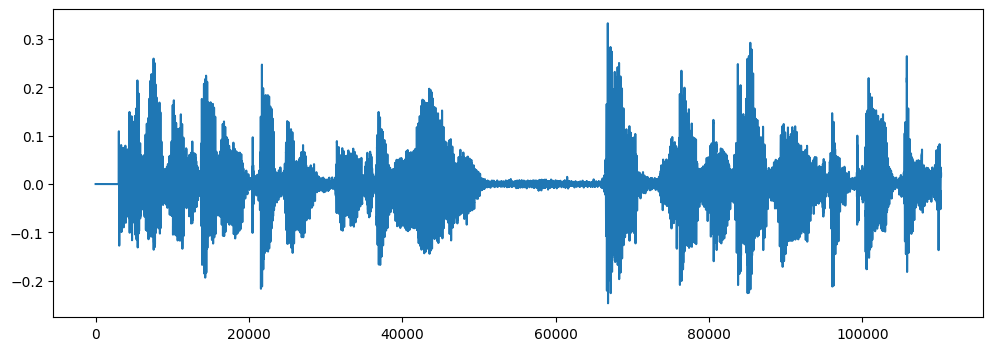

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

#### Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [ ]:
wave_audio

array([[       0,        0],
       [       0,        0],
       [       0,        0],
       ...,
       [44761088, 44761088],
       [44826624, 44826624],
       [42663936, 42663936]], dtype=int32)

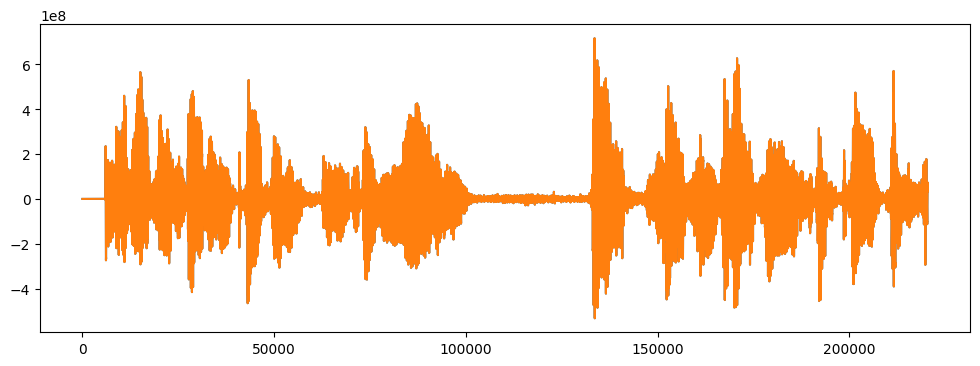

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

### Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio
samples.
The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 216)


In [ ]:
mfccs

array([[-6.8665784e+02, -6.8665784e+02, -6.8665784e+02, ...,
        -2.8886581e+02, -3.0295493e+02, -3.3015637e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         5.0716267e+01,  1.0547531e+02,  1.3131479e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         5.8162680e+00,  3.4767998e+01,  5.0440628e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.2125662e+01, -1.1769721e+01, -8.2184315e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         8.1089020e-02,  1.6721478e-01, -3.1698520e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         9.5486557e-01, -3.7237506e+00, -5.5795794e+00]], dtype=float32)

In [27]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('/content/drive/MyDrive/PD_Data/PD.csv')
metadata.head()

,Unnamed: 0,img_path,label,audio_path
0,0,/content/drive/MyDrive/PD_Data/imgs/parkinson_...,1,/content/drive/MyDrive/PD_Data/audio/parkinson...
1,1,/content/drive/MyDrive/PD_Data/imgs/parkinson_...,1,/content/drive/MyDrive/PD_Data/audio/parkinson...
2,2,/content/drive/MyDrive/PD_Data/imgs/parkinson_...,1,/content/drive/MyDrive/PD_Data/audio/parkinson...
3,3,/content/drive/MyDrive/PD_Data/imgs/parkinson_...,1,/content/drive/MyDrive/PD_Data/audio/parkinson...
4,4,/content/drive/MyDrive/PD_Data/imgs/parkinson_...,1,/content/drive/MyDrive/PD_Data/audio/parkinson...


In [33]:
metadata =metadata.dropna()

In [20]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features


In [16]:
!pip install resampy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 17.1 MB/s eta 0:00:00


In [57]:
import resampy
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients
metadata['features'] = None

for index, row in metadata.iterrows():
    file_name = row["audio_path"]
    data = features_extractor(file_name)
    if data is not None:
        metadata.at[index, 'features'] = data



<ipython-input-57-139816af0b16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata['features'] = None


In [66]:
metadata.to_csv("" , )

<ipython-input-66-e04d507c9f2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata.rename(columns={'features': 'mfcc'}, inplace=True)


In [35]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-310.08588, 144.27586, 22.283592, 24.739786, ...",1
1,"[-305.36154, 151.59064, 17.337847, 15.328877, ...",1
2,"[-298.43488, 143.4179, 8.849281, 20.252604, -1...",1
3,"[-313.74124, 132.58064, 22.564722, 19.340528, ...",1
4,"[-315.90396, 153.26161, 7.4231963, 23.949207, ...",1


In [67]:
import pickle

# Save the variable
with open('/content/drive/MyDrive/PD_Data/PD.pkl', 'wb') as f:
  pickle.dump(metadata, f)

In [36]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [37]:
X.shape

(2559, 40)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [38]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [45]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
          3.3314774e+00, -1.4786109e+00,  2.8736601e+00]],

       [[-1.4074220e+01,  9.1916939e+01, -8.6787214e+00, ...,
         -3.3844023e+00, -5.2119045e+00, -1.5936136e+00]],

       [[-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
          2.0491767e+00, -8.0537486e-01,  2.7793026e+00]],

       ...,

       [[-4.2699332e+02,  9.2890656e+01,  3.0233388e+00, ...,
          8.6335975e-01,  6.4766806e-01,  7.8490508e-01]],

       [[-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
          1.3777871e+00, -1.9530845e+00, -8.9652127e-01]],

       [[-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
         -5.1484952e+00, -3.6400862e+00, -1.3321606e+00]]], dtype=float32)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(6985, 1, 40)

In [ ]:
X_test.shape

(1747, 1, 40)

In [ ]:
y_train.shape

(6985, 10)

In [ ]:
y_test.shape

(1747, 10)

### Model Creation

In [39]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [41]:
### No of classes
num_labels=y.shape[1]

In [42]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               4100      
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_9 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)              

In [43]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [46]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
62/64 [============================>.] - ETA: 0s - loss: 11.6918 - accuracy: 0.5010
Epoch 1: val_loss improved from inf to 0.68220, saving model to saved_models/audio_classification.hdf5
64/64 [==============================] - 2s 7ms/step - loss: 11.5018 - accuracy: 0.5022 - val_loss: 0.6822 - val_accuracy: 0.5801
Epoch 2/100
47/64 [=====================>........] - ETA: 0s - loss: 3.7586 - accuracy: 0.5346

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.68220 to 0.67198, saving model to saved_models/audio_classification.hdf5
64/64 [==============================] - 0s 4ms/step - loss: 3.4155 - accuracy: 0.5335 - val_loss: 0.6720 - val_accuracy: 0.5469
Epoch 3/100
45/64 [====================>.........] - ETA: 0s - loss: 2.0537 - accuracy: 0.5188
Epoch 3: val_loss did not improve from 0.67198
64/64 [==============================] - 0s 3ms/step - loss: 1.8998 - accuracy: 0.5232 - val_loss: 0.6840 - val_accuracy: 0.4551
Epoch 4/100
63/64 [============================>.] - ETA: 0s - loss: 1.0876 - accuracy: 0.5660
Epoch 4: val_loss did not improve from 0.67198
64/64 [==============================] - 0s 3ms/step - loss: 1.0879 - accuracy: 0.5647 - val_loss: 0.6931 - val_accuracy: 0.4102
Epoch 5/100
47/64 [=====================>........] - ETA: 0s - loss: 0.9739 - accuracy: 0.5406
Epoch 5: val_loss did not improve from 0.67198
64/64 [==============================] - 0s 3ms/step - loss: 0.9417 - accuracy:

In [47]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.9921875


In [48]:
prediction_feature.shape

NameError: name 'prediction_feature' is not defined

In [ ]:
X_test[1]

In [ ]:
model.predict_classes(X_test)

### Testing Some Test Audio Data

Steps
- Preprocess the new audio data
- predict the classes
- Invere transform your Predicted Label

In [50]:
filename="/content/drive/MyDrive/PD_Data/audio/non_parkinson/Asha Curran/segment_10.wav"
audio, sample_rate = librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-350.5742       73.37818       2.793057     24.756264      2.352928
   -3.1827397    -1.5016795    -9.187049     -5.0413203    -1.9209688
  -10.983815     -3.201474     -7.5925837    -0.76529455    1.2351906
   -5.13822      -0.75014126   -3.1505842    -3.474901     -0.9104304
   -3.1646943    -4.591261     -4.144744     -2.1670246    -5.042373
   -1.438695     -4.2952366    -3.063411     -1.950654      2.375653
    0.6093597     3.0909        1.204606      1.8304063    -2.0966663
   -1.3597155    -2.3535948    -0.67185044   -0.7070405     0.8910838 ]
[[-350.5742       73.37818       2.793057     24.756264      2.352928
    -3.1827397    -1.5016795    -9.187049     -5.0413203    -1.9209688
   -10.983815     -3.201474     -7.5925837    -0.76529455    1.2351906
    -5.13822      -0.75014126   -3.1505842    -3.474901     -0.9104304
    -3.1646943    -4.591261     -4.144744     -2.1670246    -5.042373
    -1.438695     -4.2952366    -3.063411     -1.950654      2.375653
     0.6093597    

AttributeError: 'Sequential' object has no attribute 'predict_classes'